# Diabetes Prediction With Logistic Regression

In [63]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
import seaborn as sns
import flask
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [127]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'target']
df = pd.read_csv("diabetes.csv", names= colnames)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   preg    769 non-null    object
 1   plas    769 non-null    object
 2   pres    769 non-null    object
 3   skin    769 non-null    object
 4   test    769 non-null    object
 5   mass    769 non-null    object
 6   pedi    769 non-null    object
 7   age     769 non-null    object
 8   target  769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [129]:
pima_df.head(5)

,preg,plas,pres,skin,test,mass,pedi,age
0,3.0,117.0,72.0,23.0,30.5,32.0,0.3725,29.0
1,6.0,148.0,72.0,35.0,0.0,33.6,0.6270,50.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.3510,31.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.6720,32.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21.0


In [130]:
non_numeric_columns = df.select_dtypes(exclude='number').columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age',
       'target'],
      dtype='object')


In [131]:
df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors='coerce')


In [132]:
df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors='coerce')
non_numeric_columns_updated = df.select_dtypes(exclude='number').columns
print("non-numeric columns now:", non_numeric_columns_updated)

Non-numeric columns after conversion: Index([], dtype='object')


In [133]:
# missing value is replaced with column's median respectively
df = df.fillna(df.median())
df

,preg,plas,pres,skin,test,mass,pedi,age,target
0,3.0,117.0,72.0,23.0,30.5,32.0,0.3725,29.0,0.0
1,6.0,148.0,72.0,35.0,0.0,33.6,0.6270,50.0,1.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.3510,31.0,0.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.6720,32.0,1.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21.0,0.0
...,...,...,...,...,...,...,...,...,...
764,10.0,101.0,76.0,48.0,180.0,32.9,0.1710,63.0,0.0
765,2.0,122.0,70.0,27.0,0.0,36.8,0.3400,27.0,0.0
766,5.0,121.0,72.0,23.0,112.0,26.2,0.2450,30.0,0.0
767,1.0,126.0,60.0,0.0,0.0,30.1,0.3490,47.0,1.0


In [134]:
#analysing the distributions
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,769.0,3.843953,3.367521,0.000,1.000,3.0000,6.000,17.00
plas,769.0,120.889467,31.952105,0.000,99.000,117.0000,140.000,199.00
pres,769.0,69.109233,19.343483,0.000,62.000,72.0000,80.000,122.00
skin,769.0,20.539662,15.942076,0.000,0.000,23.0000,32.000,99.00
test,769.0,79.735371,115.182670,0.000,0.000,30.5000,127.000,846.00
mass,769.0,31.992588,7.879026,0.000,27.300,32.0000,36.600,67.10
pedi,769.0,0.471747,0.331132,0.078,0.244,0.3725,0.626,2.42
age,769.0,33.235371,11.753568,21.000,24.000,29.0000,41.000,81.00


In [135]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age',
       'target'],
      dtype='object')

In [136]:
X= df.drop('target',axis=1)
Y=df.pop('target')

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [138]:
df

,preg,plas,pres,skin,test,mass,pedi,age
0,3.0,117.0,72.0,23.0,30.5,32.0,0.3725,29.0
1,6.0,148.0,72.0,35.0,0.0,33.6,0.6270,50.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.3510,31.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.6720,32.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21.0
...,...,...,...,...,...,...,...,...
764,10.0,101.0,76.0,48.0,180.0,32.9,0.1710,63.0
765,2.0,122.0,70.0,27.0,0.0,36.8,0.3400,27.0
766,5.0,121.0,72.0,23.0,112.0,26.2,0.2450,30.0
767,1.0,126.0,60.0,0.0,0.0,30.1,0.3490,47.0


In [139]:
X_train

,preg,plas,pres,skin,test,mass,pedi,age
690,1.0,144.0,82.0,46.0,180.0,46.1,0.335,46.0
385,1.0,125.0,70.0,24.0,110.0,24.3,0.221,25.0
186,7.0,194.0,68.0,28.0,0.0,35.9,0.745,41.0
188,1.0,128.0,98.0,41.0,58.0,32.0,1.321,33.0
8,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0
...,...,...,...,...,...,...,...,...
75,1.0,79.0,75.0,30.0,0.0,32.0,0.396,22.0
599,1.0,173.0,74.0,0.0,0.0,36.8,0.088,38.0
575,1.0,143.0,86.0,30.0,330.0,30.1,0.892,23.0
337,0.0,117.0,0.0,0.0,0.0,33.8,0.932,44.0


In [140]:
#fitting the model

In [141]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8051948051948052
[[143  18]
 [ 27  43]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       161
         1.0       0.70      0.61      0.66        70

    accuracy                           0.81       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.80      0.81      0.80       231



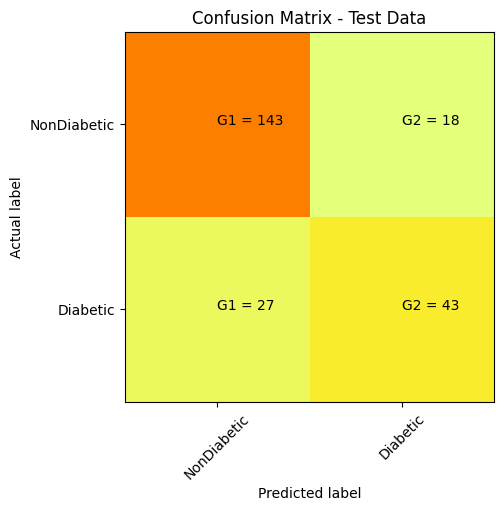

In [142]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['NonDiabetic', 'Diabetic']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [ ]:
#serialize the trained model

In [143]:
import pickle

In [62]:
pickle.dump(model,open('model.pk2','wb+'))